Some Reseach Questions: 
•	How do traditional statistical models (e.g., Logistic Regression, Cox Proportional Hazards) compare to machine learning models (e.g., Random Forests, Neural Networks) in predicting bankruptcy?
•	Can ensemble methods improve the accuracy of bankruptcy prediction compared to standalone models?
•	Which financial ratios related to profitability, liquidity, leverage, efficiency, coverage and Altman z-score, etc. are the most significant predictors of bankruptcy across industries?
•	How does the size of a company (e.g., small vs. large enterprises) influence the effectiveness of bankruptcy prediction models?
•	How do economic crises or recessions impact bankruptcy risk?

In this section, we will load the data and do some exploratory data analysis. 

The target variable in the original dataset is status_label which labels a company as either 'alive' or 'failed'. A 'failed' status is for companies that enter either chapter 7 bankruptcy or chapter 11 bankruptcy. These are regulatory filings under the US Bankruptcy code. Chapter 7 is an outright liquidation (a true final event); Chapter 11 allows a company to continue but is in restructuring. This is not necessarily a final event. 

Some issues to explore with the data: 

Are there multiple events for any given company? 

Are there any cases in which a company has a 'failed' status then reverts to an 'alive' status? (Which may indicate that they were in chapter 11 bankruptcy.)

How many companies entered the dataset after 1999? How many companies are left_censored?

How many companies are there, and by year. How many failures are there, and by year?


LOAD DATA

In [1]:
# Load the data
import pandas as pd

# Define the file path
file_path = r'C:\Users\deanh\OneDrive\DSI\modules\Company-Bankruptcy-Prediction\american_bankruptcy.csv'

# Load the data
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


  company_name status_label  year       X1       X2      X3      X4       X5  \
0          C_1        alive  1999  511.267  833.107  18.373  89.031  336.018   
1          C_1        alive  2000  485.856  713.811  18.577  64.367  320.590   
2          C_1        alive  2001  436.656  526.477  22.496  27.207  286.588   
3          C_1        alive  2002  396.412  496.747  27.172  30.745  259.954   
4          C_1        alive  2003  432.204  523.302  26.680  47.491  247.245   

       X6       X7  ...        X9      X10      X11     X12      X13      X14  \
0  35.163  128.348  ...  1024.333  740.998  180.447  70.658  191.226  163.816   
1  18.531  115.187  ...   874.255  701.854  179.987  45.790  160.444  125.392   
2 -58.939   77.528  ...   638.721  710.199  217.699   4.711  112.244  150.464   
3 -12.410   66.322  ...   606.337  686.621  164.658   3.573  109.590  203.575   
4   3.504  104.661  ...   651.958  709.292  248.666  20.811  128.656  131.261   

       X15       X16      X17   

EXPLORATORY DATA ANALYSIS AND CLEANING

In [2]:
df['status_label'].value_counts()


status_label
alive     73462
failed     5220
Name: count, dtype: int64

In [3]:
# Count the number of unique companies in the dataset
num_unique_companies = df['company_name'].nunique()

print("Number of unique companies in the dataset:", num_unique_companies)

Number of unique companies in the dataset: 8971


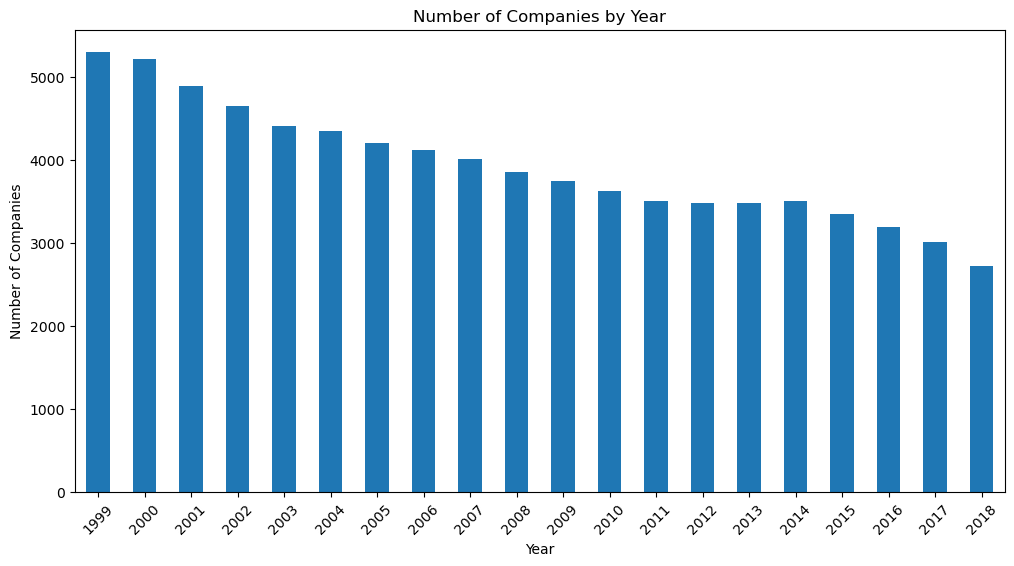

In [4]:
# Plot the number of companies in each year
import matplotlib.pyplot as plt

# Count the number of unique companies for each year
companies_by_year = df.groupby('year')['company_name'].nunique()

# Plot the results using a bar plot
plt.figure(figsize=(12, 6))
companies_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.title('Number of Companies by Year')
plt.xticks(rotation=45)
plt.show()

Number of left-censored companies (first year is 1999): 5308


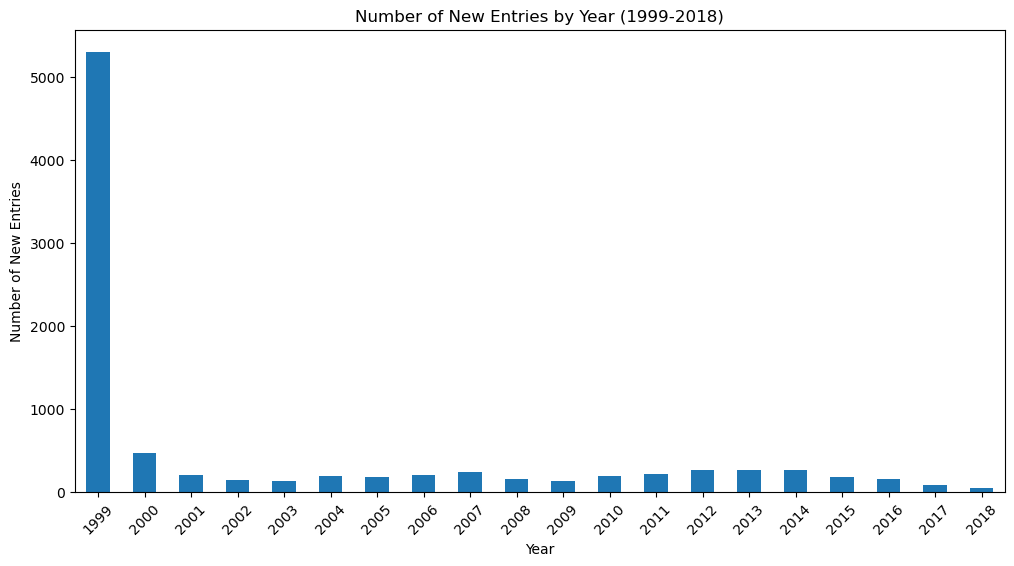

In [5]:
# Plot the first year each company appears in the dataset

# Plot the count of the first year each company appears in the dataset
first_year = df.groupby('company_name')['year'].min().reset_index()
first_year.columns = ['company_name', 'first_year']

# Filter the DataFrame to include only companies whose first year is 1999
left_censored_companies = first_year[first_year['first_year'] == 1999]

# Count the number of left-censored companies
num_left_censored_companies = left_censored_companies['company_name'].nunique()

print("Number of left-censored companies (first year is 1999):", num_left_censored_companies)

# Filter the DataFrame to include only rows where the first year is 1999 or later
first_year_after_1999 = first_year[first_year['first_year'] >= 1999]

# Count the number of new entries for each year
new_entries_by_year = first_year_after_1999['first_year'].value_counts().sort_index()

# Plot the results using a bar plot
plt.figure(figsize=(12, 6))
new_entries_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of New Entries')
plt.title('Number of New Entries by Year (1999-2018)')
plt.xticks(rotation=45)
plt.show()

EXPLORING THE TARGET

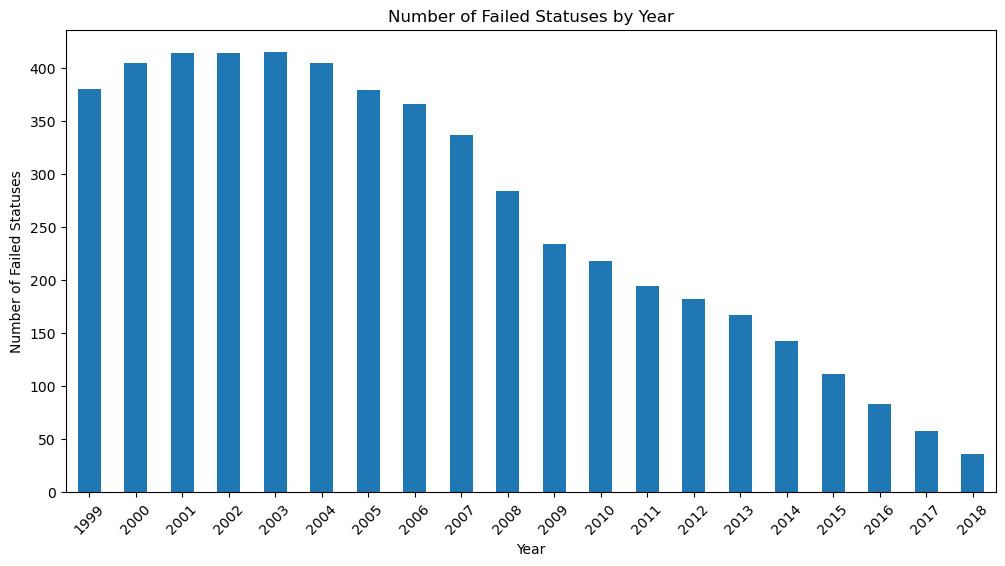

In [6]:
# Plot the 'failed' statuses by year

# Filter the DataFrame to include only rows where status_label is 'failed'
failed_df = df[df['status_label'] == 'failed']

# Count the number of 'failed' statuses for each year
failed_by_year = failed_df['year'].value_counts().sort_index()

# Plot the results using a bar plot
plt.figure(figsize=(12, 6))
failed_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Failed Statuses')
plt.title('Number of Failed Statuses by Year')
plt.xticks(rotation=45)
plt.show()

In [7]:
# Check for multiple failed statuses for each company
# Filter the DataFrame to include only rows where status_label is 'failed'
failed_df = df[df['status_label'] == 'failed']

# Group by company_name and count the number of occurrences of 'failed' status for each company
failed_counts = failed_df.groupby('company_name').size()

# Filter to include only companies with more than one 'failed' status
companies_with_multiple_failures = failed_counts[failed_counts > 1]

# Count the number of such companies
num_companies_with_multiple_failures = companies_with_multiple_failures.count()

print("Number of companies with more than one 'failed' status:", num_companies_with_multiple_failures)

Number of companies with more than one 'failed' status: 599


In [8]:
# Find the maximum count of 'failed' statuses for any company
# Filter the DataFrame to include only rows where status_label is 
# 'failed'
failed_df = df[df['status_label'] == 'failed']

# Group by company_name and count the number of 'failed' statuses for each company
failed_counts = failed_df.groupby('company_name').size()

# Find the maximum count of 'failed' statuses for any company
max_failed_count = failed_counts.max()

print("Maximum count of 'failed' statuses for any company:", max_failed_count)

Maximum count of 'failed' statuses for any company: 20


This suggests that 'failed' is likely mislabeled in these cases since no company would be in chapter 11 bankruptcy for so long.

In [9]:
# How many observations would be lost if we removed all observations 
# for each company that occur after the first 'failed' status for that 
# company? 

# Sort the DataFrame by company_name and year
df = df.sort_values(by=['company_name', 'year'])

# Identify the first occurrence of 'failed' status for each company
first_failed = df[df['status_label'] == 'failed'].groupby('company_name')['year'].min().reset_index()
first_failed.columns = ['company_name', 'first_failed_year']

# Merge the first_failed DataFrame with the original DataFrame
df = df.merge(first_failed, on='company_name', how='left')

# Filter out observations that occur after the first 'failed' status for each company
observations_to_drop = df[(df['status_label'] == 'failed') & (df['year'] > df['first_failed_year'])]

# Count the number of observations that would be lost
num_observations_lost = observations_to_drop.shape[0]

print("Number of observations that would be lost:", num_observations_lost)

Number of observations that would be lost: 4611


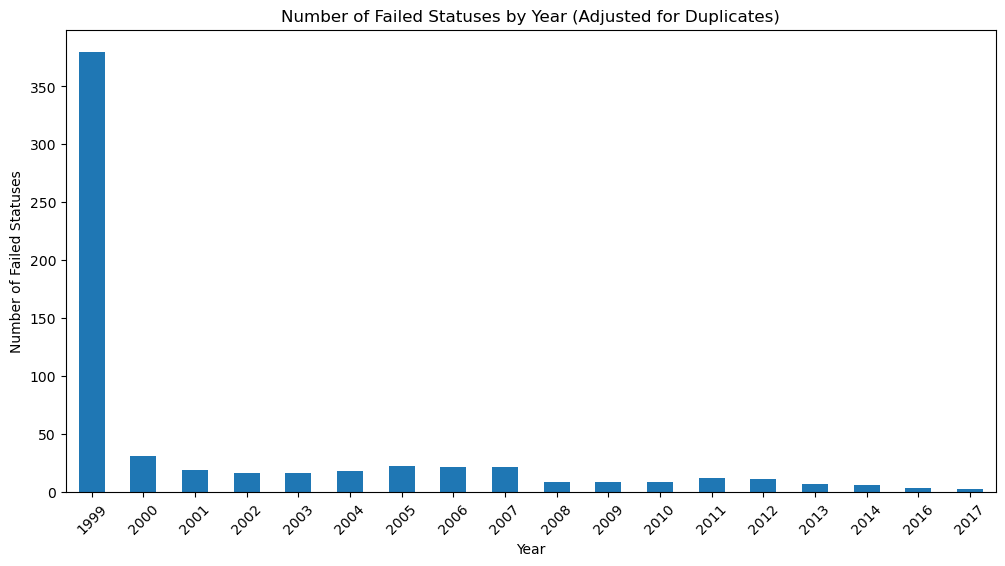

In [10]:
# Plot the failed companies by year using the first instance of 
# 'failed' year for each company

# Filter the DataFrame to include only rows where status_label is 'failed'
failed_df = df[df['status_label'] == 'failed']

# Remove duplicates by keeping only the first instance of 'failed' status for each company
failed_df = failed_df.drop_duplicates(subset='company_name', keep='first')

# Count the number of 'failed' statuses for each year
failed_by_year = failed_df['year'].value_counts().sort_index()

# Plot the results using a bar plot
plt.figure(figsize=(12, 6))
failed_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Failed Statuses')
plt.title('Number of Failed Statuses by Year (Adjusted for Duplicates)')
plt.xticks(rotation=45)
plt.show()

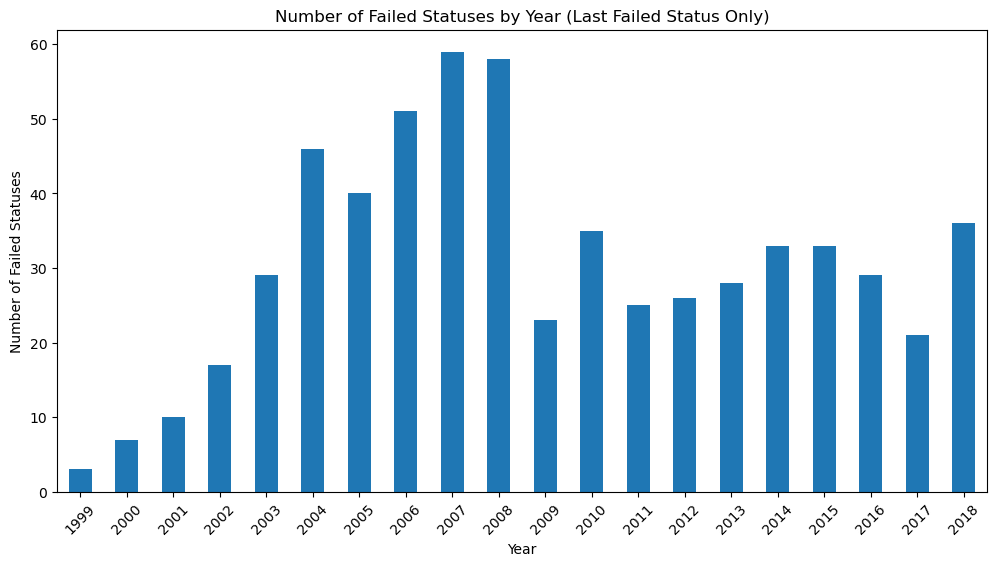

In [11]:
# Plot the failed companies by year using the last instance of
# 'failed' year for each company

# Filter the DataFrame to include only rows where status_label is 'failed'
failed_df_original = df[df['status_label'] == 'failed']

# Remove duplicates by keeping only the last instance of 'failed' status for each company
failed_df_last = failed_df_original.drop_duplicates(subset='company_name', keep='last')

# Count the number of 'failed' statuses for each year
failed_by_year_last = failed_df_last['year'].value_counts().sort_index()

# Plot the results using a bar plot
plt.figure(figsize=(12, 6))
failed_by_year_last.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Failed Statuses')
plt.title('Number of Failed Statuses by Year (Last Failed Status Only)')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Check on the total number of 'failed' statuses (original and 
# adjusted): should 5220 - 609 (= 4611) 
# Filter the DataFrame to include only rows where status_label is 'failed'
failed_df_original = df[df['status_label'] == 'failed']

# Count the total number of 'failed' statuses (original)
total_failed_original = failed_df_original.shape[0]

# Remove duplicates by keeping only the first instance of 'failed' status for each company
failed_df_first = failed_df_original.drop_duplicates(subset='company_name', keep='first')

# Count the total number of 'failed' statuses (first instance)
total_failed_first = failed_df_first.shape[0]

# Remove duplicates by keeping only the last instance of 'failed' status for each company
failed_df_last = failed_df_original.drop_duplicates(subset='company_name', keep='last')

# Count the total number of 'failed' statuses (last instance)
total_failed_last = failed_df_last.shape[0]

# Print the total counts
print("Total count of 'failed' statuses (original):", total_failed_original)
print("Total count of 'failed' statuses (first instance):", total_failed_first)
print("Total count of 'failed' statuses (last instance):", total_failed_last)

Total count of 'failed' statuses (original): 5220
Total count of 'failed' statuses (first instance): 609
Total count of 'failed' statuses (last instance): 609


In [13]:
# Check if there are any companies with 'alive' status after any
# 'failed' status
# Identify companies with at least one 'failed' status
companies_with_failed = df[df['status_label'] == 'failed']['company_name'].unique()

# Filter the DataFrame to include only these companies and sort by company_name and year
filtered_df = df[df['company_name'].isin(companies_with_failed)].sort_values(by=['company_name', 'year'])

# Count companies with 'alive' status after any 'failed' status
num_companies_with_alive_after_failed = sum(
    any((row['status_label'] == 'alive') and (row['year'] > failed_year)
        for _, row in company_df.iterrows())
    for company, company_df in filtered_df.groupby('company_name')
)

# Print the count
print("Number of companies with 'alive' status after any 'failed' status:", num_companies_with_alive_after_failed)

Number of companies with 'alive' status after any 'failed' status: 0


The target variable is 'label_status' = 'failed'.
There are a number of companies that have more than one 'failed' status. And at least one of these has a 'failed' status across all years. Since it is highly unlikely that a company remains in chapter 11 for so long, these are likely mislabeled. A couple of possible approaches: 

1. drop all companies with multiple 'failed': 599 companies (which means that 599 companies account for most of the failures, which wouldn't leave many remaining failures)
2. drop all of 1999: because the distribution of failures seems relatively high. 
3. drop all observations after the first 'failed' in companies with more than one. (this seems implausible, and distribution is suspect)
4. re-label all but the last 'failed' with 'alive' (or set up new label). This would also fix the first two issues. (This is the most plausible approach.)

The original dataset had a total of 5220 'failed' status across all companies and years. Re-labeling all but the last as 'alive' reduces the 'failed' to 609, which means 6.8% of 8971 companies failed. This is very much in line with expectations. Using the first instance of 'failed' (and dropping the rest) would reduce the dataset by 4611 observations. Using the last retains the original data structure. 


SET UP A NEW TARGET VARIABLE 

In [14]:
# Set up new target variable for last instance of 'failed' status
# Summarize the target_last column
# Identify the last instance of 'failed' status for each company
df['target_last'] = 0  # Initialize the new variable with 0
last_failed_indices = df[df['status_label'] == 'failed'].groupby('company_name')['year'].idxmax()

# Set the last instance of 'failed' status to 1
df.loc[last_failed_indices, 'target_last'] = 1

# Summarize the target_last column
print("Summary of target_last:\n", df['target_last'].value_counts())

Summary of target_last:
 target_last
0    78073
1      609
Name: count, dtype: int64


VARIABLE DESCRIPTIONS

**X1	Current assets** - All the assets of a company that are expected to be sold or used as a result of standard business operations over the next year
**X2	Cost of goods sold** - The total amount a company paid as a cost directly related to the sale of products
**X3	Depreciation and amortization** - Depreciation refers to the loss of value of a tangible fixed asset over time (such as property, machinery, buildings, and plant). Amortization refers to the loss of value of intangible assets over time.
**X4	EBITDA** - Earnings before interest, taxes, depreciation, and amortization. It is a measure of a company's overall financial performance, serving as an alternative to net income.
**X5	Inventory** - The accounting of items and raw materials that a company either uses in production or sells.
**X6	Net Income** - The overall profitability of a company after all expenses and costs have been deducted from total revenue.
**X7	Total Receivables** - The balance of money due to a firm for goods or services delivered or used but not yet paid for by customers.
**X8	Market value** - The price of an asset in a marketplace. In this dataset, it refers to the market capitalization since companies are publicly traded in the stock market.
**X9	Net sales** - The sum of a company's gross sales minus its returns, allowances, and discounts.
**X10	Total assets** - All the assets, or items of value, a business owns.
**X11	Total Long-term debt** - A company's loans and other liabilities that will not become due within one year of the balance sheet date.
**X12	EBIT** - Earnings before interest and taxes.
**X13	Gross Profit** - The profit a business makes after subtracting all the costs that are related to manufacturing and selling its products or services.
**X14	Total Current Liabilities** - The sum of accounts payable, accrued liabilities, and taxes such as Bonds payable at the end of the year, salaries, and commissions remaining.
**X15	Retained Earnings** - The amount of profit a company has left over after paying all its direct costs, indirect costs, income taxes, and its dividends to shareholders.
**X16	Total Revenue** - The amount of income that a business has made from all sales before subtracting expenses. It may include interest and dividends from investments.
**X17	Total Liabilities** - The combined debts and obligations that the company owes to outside parties.
**X18	Total Operating Expenses** - The expenses a business incurs through its normal business operations.

The most relevant variable to include would be one of the following as a proxy for company size (transformed):
X8 - market value
X10 - total assets* usually the most stable over time

In [15]:
# Check column names
print(df.columns)

# Summary of the dataset (e.g., variable types, non-null counts)
print(df.info())


Index(['company_name', 'status_label', 'year', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18', 'first_failed_year', 'target_last'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company_name       78682 non-null  object 
 1   status_label       78682 non-null  object 
 2   year               78682 non-null  int64  
 3   X1                 78682 non-null  float64
 4   X2                 78682 non-null  float64
 5   X3                 78682 non-null  float64
 6   X4                 78682 non-null  float64
 7   X5                 78682 non-null  float64
 8   X6                 78682 non-null  float64
 9   X7                 78682 non-null  float64
 10  X8                 78682 non-null  float64
 11  X9                 78682 

In [16]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicated rows
print(df.duplicated().sum())

# Check the shape of the dataset
print(df.shape)

company_name             0
status_label             0
year                     0
X1                       0
X2                       0
X3                       0
X4                       0
X5                       0
X6                       0
X7                       0
X8                       0
X9                       0
X10                      0
X11                      0
X12                      0
X13                      0
X14                      0
X15                      0
X16                      0
X17                      0
X18                      0
first_failed_year    73462
target_last              0
dtype: int64
0
(78682, 23)


In [17]:
# Display summary statistics for the main variables
main_features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 
                 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 
                 'X16', 'X17', 'X18']
summary_stats = df[main_features].describe().round(3)   

print(summary_stats)

               X1          X2         X3         X4         X5          X6  \
count   78682.000   78682.000  78682.000  78682.000  78682.000   78682.000   
mean      880.362    1594.529    121.234    376.759    201.606     129.382   
std      3928.565    8930.485    652.377   2012.023   1060.766    1265.532   
min        -7.760    -366.645      0.000 -21913.000      0.000  -98696.000   
25%        18.924      17.038      1.192     -0.811      0.000      -7.416   
50%       100.450     103.661      7.930     15.035      7.023       1.616   
75%       431.527     634.548     47.972    139.655     74.747      40.144   
max    169662.000  374623.000  28430.000  81730.000  62567.000  104821.000   

              X7           X8          X9         X10         X11        X12  \
count  78682.000    78682.000   78682.000   78682.000   78682.000  78682.000   
mean     286.833     3414.355    2364.020    2867.111     722.484    255.525   
std     1335.979    18414.104   11950.069   12917.944    

In [18]:
# Calculate skewness for the main variables
skewness = df[main_features].skew()

print(skewness)

X1     14.843279
X2     20.052194
X3     17.860473
X4     16.403531
X5     22.568626
X6     11.866809
X7     15.844958
X8     18.194283
X9     18.987110
X10    13.562208
X11    14.848021
X12    17.968030
X13    15.295829
X14    14.225186
X15    29.607949
X16    18.987110
X17    13.767802
X18    20.384520
dtype: float64


In [19]:
# This runs alternative tests of skewness in a given variable. All 
# X1-X18 variables are skewed so would need to be transformed. But 
# only two are especially relevant X8, and X10 which would be a proxy 
# for company size. The result closest to zero will be chosen as the 
# transformation.
# 
import numpy as np
from scipy.stats import boxcox

def test_skewness(column):
    # Log Transformation
    df[f'{column}_log'] = np.log1p(df[column])

    # Square Root Transformation
    df[f'{column}_sqrt'] = np.sqrt(df[column])

    # Box-Cox Transformation (requires positive values)
    df[f'{column}_boxcox'], _ = boxcox(df[column] + 1)  # Adding 1 to ensure all values are positive

    # Reciprocal Transformation
    df[f'{column}_reciprocal'] = 1 / (df[column] + 1)  # Adding 1 to avoid division by zero

    # Calculate skewness after transformation
    skewness_log = df[f'{column}_log'].skew()
    skewness_sqrt = df[f'{column}_sqrt'].skew()
    skewness_boxcox = df[f'{column}_boxcox'].skew()
    skewness_reciprocal = df[f'{column}_reciprocal'].skew()

    print(f'Skewness for {column} after log transformation: {skewness_log}')
    print(f'Skewness for {column} after square root transformation: {skewness_sqrt}')
    print(f'Skewness for {column} after Box-Cox transformation: {skewness_boxcox}')
    print(f'Skewness for {column} after reciprocal transformation: {skewness_reciprocal}')

# Test skewness for X8
test_skewness('X8')

# Test skewness for X10
test_skewness('X10')

Skewness for X8 after log transformation: 0.10678961133809589
Skewness for X8 after square root transformation: 4.997809056011178
Skewness for X8 after Box-Cox transformation: 0.007642593193632652
Skewness for X8 after reciprocal transformation: 4.5706195913672785
Skewness for X10 after log transformation: 0.04027402633070034
Skewness for X10 after square root transformation: 4.196588574823338
Skewness for X10 after Box-Cox transformation: 0.0023112959359959215
Skewness for X10 after reciprocal transformation: 4.376102695502445


In [20]:
# Drop the square root and reciprocal transformations for both X8 and 
# X10
columns_to_drop = ['X8_sqrt', 'X8_reciprocal', 'X10_sqrt', 'X10_reciprocal']
df.drop(columns=columns_to_drop, inplace=True)

# Print the remaining columns to verify
print("Remaining columns in the DataFrame:")
print(df.columns)

Remaining columns in the DataFrame:
Index(['company_name', 'status_label', 'year', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18', 'first_failed_year', 'target_last', 'X8_log', 'X8_boxcox',
       'X10_log', 'X10_boxcox'],
      dtype='object')


In [21]:

# Drop the first_failed_year column from the original DataFrame
df.drop(columns=['first_failed_year'], inplace=True)


In [22]:
# Create a left_censored variable:
# Identify the first year in the dataset
first_year_in_dataset = df['year'].min()

# Identify the first year each company appears in the dataset
first_year_per_company = df.groupby('company_name')['year'].min()

# Create a new variable 'left_censored' where 1 indicates the company is left-censored
df['left_censored'] = df['company_name'].map(lambda x: 1 if first_year_per_company[x] == first_year_in_dataset else 0)

# Print the total count of left-censored companies
total_left_censored = df['left_censored'].sum()
print("Total count of left-censored companies:", total_left_censored)

Total count of left-censored companies: 54934


In [23]:
# Create a single dummy variable for the period
df['period_after_2008'] = df['year'].apply(lambda x: 1 if x > 2008 else 0)

# Verify the counts for the dummy variable
print("Count for years up to and including 2008 (0):", (df['period_after_2008'] == 0).sum())
print("Count for years after 2008 (1):", (df['period_after_2008'] == 1).sum())

Count for years up to and including 2008 (0): 45046
Count for years after 2008 (1): 33636


In [24]:
# Get a list of all variables (columns) in the DataFrame
all_variables = df.columns.tolist()

# Print the list of variables
print(all_variables)

['company_name', 'status_label', 'year', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'target_last', 'X8_log', 'X8_boxcox', 'X10_log', 'X10_boxcox', 'left_censored', 'period_after_2008']


FEATURE ENGINEERING

In [25]:
# Create Financial Ratios and Derived Features
# The commented out ratios produce NaN values due to division by zero 
# or invalid values (could add 1 to denominator to avoid division by zero)

# Liquidity Ratios
df['current_ratio'] = df['X1'] / df['X14']
df['quick_ratio'] = (df['X1'] - df['X5']) / df['X14']

# Leverage Ratios
df['debt_to_equity_ratio'] = df['X17'] / (df['X10'] - df['X17'])
df['long_term_debt_to_assets'] = df['X11'] / df['X10']

# Profitability Ratios
df['profit_margin'] = df['X6'] / df['X16']
df['gross_margin'] = df['X13'] / df['X16']
df['return_on_assets'] = df['X6'] / df['X10']
df['return_on_equity'] = df['X6'] / (df['X10'] - df['X17'])

# Efficiency Ratios
df['asset_turnover'] = df['X9'] / df['X10']

# Altman Z-Score Components
df['working_capital_to_assets'] = (df['X1'] - df['X14']) / df['X10']
df['retained_earnings_to_assets'] = df['X15'] / df['X10']
df['ebit_to_assets'] = df['X12'] / df['X10']
df['market_value_to_liabilities'] = df['X8'] / df['X17']
df['sales_to_assets'] = df['X9'] / df['X10']

# Altman Z-Score
df['z_score'] = 1.2 * df['working_capital_to_assets'] + 1.4 * df['retained_earnings_to_assets'] + 3.3 * df['ebit_to_assets'] + 0.6 * df['market_value_to_liabilities'] + 1.0 * df['sales_to_assets']

# Bankruptcy Indicator (of when the Altman Z-Score is in a distress zone)
# Z-Score < 1.81 indicates distress zone
df['bankruptcy'] = (df['z_score'] < 1.81).astype(int)

# Market to book ratio
df['market_to_book'] = df['X8'] / (df['X10'] - df['X17'])   


LIST OF NEW FEATURES
'current_ratio'
'quick_ratio'
'debt_to_equity_ratio'
'long_term_debt_to_assets'
'profit_margin'
'gross_margin'
'return_on_assets'
'return_on_equity'
'asset_turnover'
'working_capital_to_assets'
'retained_earnings_to_assets'
'ebit_to_assets'
'market_value_to_liabilities'
'sales_to_assets'
'z_score'
'bankruptcy'
'market_to_book'
'left_censored'
'period_after_2008'  

Some other features that were created and considered, but these return too many NaN values:
Efficiency Ratios
df['receivables_turnover'] = df['X9'] / df['X7']
df['inventory_turnover'] = df['X2'] / df['X5']

Coverage Ratios
df['interest_coverage_ratio'] = df['X12'] / df['X11']  # Assuming interest expense = long-term debt
df['debt_service_coverage_ratio'] = df['X4'] / df['X11']

Growth Rates
Sort the data by company name and year
df = df.sort_values(by=['company_name', 'year'])

Sales Growth
df['sales_growth'] = df.groupby('company_name')['X9'].pct_change()

EBITDA Growth
df['ebitda_growth'] = df.groupby('company_name')['X4'].pct_change()

Creating change variables generates nan values for the first year 
of each company. So either have to drop or fill with 0.



In [26]:
# Define the new features
new_features = [
    'current_ratio', 'quick_ratio', 'debt_to_equity_ratio', 'long_term_debt_to_assets',
    'profit_margin', 'gross_margin', 'return_on_assets', 'return_on_equity',
    'asset_turnover', 'working_capital_to_assets', 'retained_earnings_to_assets',
    'ebit_to_assets', 'market_value_to_liabilities', 'sales_to_assets', 'z_score',
    'bankruptcy', 'market_to_book', 'left_censored', 'period_after_2008'
]

# Check for missing values
missing_values = df[new_features].isnull().sum()
print("Missing values per column:\n", missing_values)

# Check for infinite values
inf_values = df[new_features].apply(lambda x: np.isinf(x).sum())
print("\nInfinite values per column:\n", inf_values)

# Check for duplicated rows
duplicated_rows = df[new_features].duplicated().sum()
print("\nNumber of duplicated rows:", duplicated_rows)

Missing values per column:
 current_ratio                  0
quick_ratio                    0
debt_to_equity_ratio           0
long_term_debt_to_assets       0
profit_margin                  0
gross_margin                   0
return_on_assets               0
return_on_equity               0
asset_turnover                 0
working_capital_to_assets      0
retained_earnings_to_assets    0
ebit_to_assets                 0
market_value_to_liabilities    0
sales_to_assets                0
z_score                        0
bankruptcy                     0
market_to_book                 0
left_censored                  0
period_after_2008              0
dtype: int64

Infinite values per column:
 current_ratio                  0
quick_ratio                    0
debt_to_equity_ratio           2
long_term_debt_to_assets       0
profit_margin                  0
gross_margin                   0
return_on_assets               0
return_on_equity               2
asset_turnover                 0
worki

Not all of these new features are relevant. Profitability, liquidity, leverage, efficiency and coverage can all impact financial viability, but typically the choice is what fits best within category (there will be high collinearity between some especially for those that are alternative measures). The Altman Z-Score Components (Altman, 1968), and the Altman z-score are also typically used to assess the financial health of a company. From the new features, some are selected for further testing.

In [33]:
# List of selected new features
selected_features = [
    'X8_boxcox', 'quick_ratio', 'debt_to_equity_ratio', 
    'long_term_debt_to_assets', 'profit_margin', 'return_on_assets', 
    'return_on_equity', 'working_capital_to_assets', 'z_score', 
    'bankruptcy', 'market_to_book', 'period_after_2008', 
    'left_censored', 'year' 
]

# Convert the specified columns to numeric
for column in selected_features:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Display summary statistics for the newly created variables
summary_stats = df[selected_features].describe().round(3)

# Print the summary statistics
print("Summary Statistics:")
print(summary_stats)


Summary Statistics:
       X8_boxcox  quick_ratio  debt_to_equity_ratio  long_term_debt_to_assets  \
count  78682.000    78682.000             78682.000                 78682.000   
mean       5.101        2.988                 3.164                     0.266   
std        2.199       88.742               337.980                    11.829   
min        0.000      -12.984             -5847.000                    -0.035   
25%        3.469        0.828                 0.271                     0.000   
50%        5.172        1.386                 0.752                     0.102   
75%        6.685        2.524                 1.662                     0.290   
max       12.271    24108.000             87701.500                  3287.000   

       profit_margin  return_on_assets  return_on_equity  \
count      78682.000         78682.000         78682.000   
mean         -11.483            -0.690            -0.505   
std          279.732            13.654           144.776   
min       

In [ ]:
# Check for NaN, inf, or -inf in the problematic columns
print("Number of NaN values:")
print(df[['return_on_equity', 'debt_to_equity_ratio', 'market_to_book']].isna().sum())

print("\nNumber of inf or -inf values:")
print((df[['return_on_equity', 'debt_to_equity_ratio', 'market_to_book']] == float('inf')).sum())
print((df[['return_on_equity', 'debt_to_equity_ratio', 'market_to_book']] == -float('inf')).sum())

In [35]:
# Check for rows where X10 - X17 is close to 0
problematic_rows = df[(df['X10'] - df['X17']).abs() < 1e-6]
print("Number of problematic rows:", problematic_rows.shape[0])

# Get the indices of the problematic rows
problematic_indices = problematic_rows.index

# Find the rows before and after each problematic row
for idx in problematic_indices:
    print(f"\nProblematic row at index {idx}:")
    print(df.loc[idx, :])  # Print the problematic row

    # Print the row before, if it exists
    if idx - 1 in df.index:
        print("\nRow before:")
        print(df.loc[idx - 1, :])

    # Print the row after, if it exists
    if idx + 1 in df.index:
        print("\nRow after:")
        print(df.loc[idx + 1, :])

Number of problematic rows: 2

Problematic row at index 60761:
company_name                   C_6980
status_label                   failed
year                             2002
X1                             2303.0
X2                             2816.0
                               ...   
z_score_sqrt                   0.9936
z_score_reciprocal            0.50321
market_to_book_log           1.050859
market_to_book_sqrt          1.363857
market_to_book_reciprocal    0.349637
Name: 60761, Length: 69, dtype: object

Row before:
company_name                   C_6980
status_label                   failed
year                             2001
X1                             2769.0
X2                             3624.0
                               ...   
z_score_sqrt                 1.492431
z_score_reciprocal           0.309852
market_to_book_log           1.444598
market_to_book_sqrt          1.800041
market_to_book_reciprocal    0.235841
Name: 60760, Length: 69, dtype: object

Row after

In [36]:
# Replace inf and -inf with NaN to handle problematic values
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Impute missing values in all derived variables with their respective medians
derived_variables = ['return_on_equity', 'debt_to_equity_ratio', 'market_to_book']
for var in derived_variables:
    df[var] = df[var].fillna(df[var].median())  # Explicitly assign the result back to the column

# Verify the fixes
print("Summary statistics after imputation:")
print(df[derived_variables].describe().round(3))

Summary statistics after imputation:
       return_on_equity  debt_to_equity_ratio  market_to_book
count         78682.000             78682.000       78682.000
mean             -0.505                 3.164          10.437
std             144.776               337.980        1262.639
min          -31837.000             -5847.000      -37026.316
25%              -0.144                 0.271           0.936
50%               0.066                 0.752           1.860
75%               0.166                 1.662           3.577
max            7770.333             87701.500      315075.155


In [37]:
# Calculate skewness for the new features
skewness = df[selected_features].skew()

print(skewness)

X8_boxcox                      0.007643
quick_ratio                  257.002266
debt_to_equity_ratio         231.424985
long_term_debt_to_assets     272.933377
profit_margin                -67.698726
return_on_assets             -63.532971
return_on_equity            -184.933477
working_capital_to_assets    -82.447206
z_score                       68.841659
bankruptcy                     0.556852
market_to_book               210.807006
period_after_2008              0.293132
left_censored                 -0.863443
year                           0.193910
dtype: float64


In [39]:
# This runs alternative tests of skewness in selected features. 
# Choose the one with the result closest to zero and use that 
# transformation.
# 
import numpy as np
from scipy.stats import boxcox

def test_skewness(column):
    # Log Transformation
    df[f'{column}_log'] = np.log1p(df[column])

    # Square Root Transformation
    df[f'{column}_sqrt'] = np.sqrt(df[column])

    # Box-Cox Transformation (requires positive values)
    # df[f'{column}_boxcox'], _ = boxcox(df[column] + 1)  # Adding 1 to ensure all values are positive

    # Reciprocal Transformation
    df[f'{column}_reciprocal'] = 1 / (df[column] + 1)  # Adding 1 to avoid division by zero

    # Calculate skewness after transformation
    skewness_log = df[f'{column}_log'].skew()
    skewness_sqrt = df[f'{column}_sqrt'].skew()
    # skewness_boxcox = df[f'{column}_boxcox'].skew()
    skewness_reciprocal = df[f'{column}_reciprocal'].skew()

    print(f'Skewness for {column} after log transformation: {skewness_log}')
    print(f'Skewness for {column} after square root transformation: {skewness_sqrt}')
    # print(f'Skewness for {column} after Box-Cox transformation: {skewness_boxcox}')
    print(f'Skewness for {column} after reciprocal transformation: {skewness_reciprocal}')

# Test skewness for selected variables
test_skewness('quick_ratio')
test_skewness('debt_to_equity_ratio')
test_skewness('long_term_debt_to_assets')
test_skewness('profit_margin')
test_skewness('return_on_assets')
test_skewness('return_on_equity')
test_skewness('working_capital_to_assets')
test_skewness('z_score')
test_skewness('market_to_book')

Skewness for quick_ratio after log transformation: 1.5177171566121905
Skewness for quick_ratio after square root transformation: 45.94464279754027
Skewness for quick_ratio after reciprocal transformation: 0.46977182214459495
Skewness for debt_to_equity_ratio after log transformation: 2.61875939255556
Skewness for debt_to_equity_ratio after square root transformation: 71.59676456329827
Skewness for debt_to_equity_ratio after reciprocal transformation: -80.300862144528
Skewness for long_term_debt_to_assets after log transformation: 5.02452868988916
Skewness for long_term_debt_to_assets after square root transformation: 41.28688708831887
Skewness for long_term_debt_to_assets after reciprocal transformation: -1.2780219777512833
Skewness for profit_margin after log transformation: nan
Skewness for profit_margin after square root transformation: 31.782532195199643
Skewness for profit_margin after reciprocal transformation: nan
Skewness for return_on_assets after log transformation: nan
Skewn

c:\Users\deanh\miniconda3\envs\dsi_participant\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\deanh\miniconda3\envs\dsi_participant\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\deanh\miniconda3\envs\dsi_participant\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Since most of the transformations require positive values, some
Nan values are returned. The boxcox returns an error for variables with negative values, so this is excluded here. 

Some of these transformations can be used: 
quick_ratio: reciprocal
debt_to_equity_ratio: log
long_term_debt_to_assets: reciprocal
return_on_equity: log
working_capital_to_assets: square root
z_score: log
market_to_book: log

Variables requiring further processing:
profit_margin
return_on_assets

We will try shifting before applying transformations.

In [40]:
print("All columns in the DataFrame:")
print(df.columns)

All columns in the DataFrame:
Index(['company_name', 'status_label', 'year', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18', 'target_last', 'X8_log', 'X8_boxcox', 'X10_log',
       'X10_boxcox', 'left_censored', 'period_after_2008', 'current_ratio',
       'quick_ratio', 'debt_to_equity_ratio', 'long_term_debt_to_assets',
       'profit_margin', 'gross_margin', 'return_on_assets', 'return_on_equity',
       'asset_turnover', 'working_capital_to_assets',
       'retained_earnings_to_assets', 'ebit_to_assets',
       'market_value_to_liabilities', 'sales_to_assets', 'z_score',
       'bankruptcy', 'market_to_book', 'quick_ratio_log', 'quick_ratio_sqrt',
       'quick_ratio_reciprocal', 'debt_to_equity_ratio_log',
       'debt_to_equity_ratio_sqrt', 'debt_to_equity_ratio_reciprocal',
       'long_term_debt_to_assets_log', 'long_term_debt_to_assets_sqrt',
       'long_term_debt_to_assets_reciprocal', 'profit

In [ ]:
# Variables requiring further processing: 
# profit_margin 
# return_on_assets 
# transformed_selected_features = [
    'X8_boxcox', 'quick_ratio_reciprocal', 'debt_to_equity_ratio_log', 
    'long_term_debt_to_assets_reciprocal', 'return_on_equity_log', 
    'working_capital_to_assets_sqrt', 'z_score_log', 
    'bankruptcy', 'market_to_book_log', 'period_after_2008', 
    'left_censored', 'year' 
]
# keep: 
# quick_ratio_reciprocal,
# debt_to_equity_ratio_log,
# long_term_debt_to_assets_reciprocal, 
# return_on_equity_log,
# working_capital_to_assets_sqrt
# z_score_log
# market_to_book_log

In [41]:
# Variables that require further processing
variables_to_process = [
    'profit_margin',
    'return_on_assets'
]

# Generate column names for square root, reciprocal, and log transformations
columns_to_drop = (
    [f"{var}_sqrt" for var in variables_to_process] +
    [f"{var}_reciprocal" for var in variables_to_process] +
    [f"{var}_log" for var in variables_to_process]  # Include log-transformed columns
)

# Drop the identified columns
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')  # Use errors='ignore' to avoid errors if columns don't exist

# Print the remaining columns to verify
print("Remaining columns in the DataFrame:")
print(df.columns)

Remaining columns in the DataFrame:
Index(['company_name', 'status_label', 'year', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18', 'target_last', 'X8_log', 'X8_boxcox', 'X10_log',
       'X10_boxcox', 'left_censored', 'period_after_2008', 'current_ratio',
       'quick_ratio', 'debt_to_equity_ratio', 'long_term_debt_to_assets',
       'profit_margin', 'gross_margin', 'return_on_assets', 'return_on_equity',
       'asset_turnover', 'working_capital_to_assets',
       'retained_earnings_to_assets', 'ebit_to_assets',
       'market_value_to_liabilities', 'sales_to_assets', 'z_score',
       'bankruptcy', 'market_to_book', 'quick_ratio_log', 'quick_ratio_sqrt',
       'quick_ratio_reciprocal', 'debt_to_equity_ratio_log',
       'debt_to_equity_ratio_sqrt', 'debt_to_equity_ratio_reciprocal',
       'long_term_debt_to_assets_log', 'long_term_debt_to_assets_sqrt',
       'long_term_debt_to_assets_reciprocal', '

In [47]:
# List of columns to drop
# keep: 
# quick_ratio_reciprocal,
# debt_to_equity_ratio_log,
# long_term_debt_to_assets_reciprocal, 
# return_on_equity_log,
# working_capital_to_assets_sqrt
# z_score_log
# market_to_book_log
columns_to_drop = [
    'quick_ratio_log', 'quick_ratio_sqrt', 
    'debt_to_equity_ratio_reciprocal', 'debt_to_equity_ratio_sqrt',
    'long_term_debt_to_assets_log', 'long_term_debt_to_assets_sqrt', 
    'return_on_equity_sqrt', 'return_on_equity_reciprocal',
    'working_capital_to_assets_log', 'working_capital_to_assets_reciprocal', 
    'z_score_sqrt', 'z_score_reciprocal',
    'market_to_book_sqrt', 'market_to_book_reciprocal'
]

# Drop the columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Print the remaining columns to verify
print("Remaining columns in the DataFrame:")
print(df.columns)

Remaining columns in the DataFrame:
Index(['company_name', 'status_label', 'year', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18', 'target_last', 'X8_log', 'X8_boxcox', 'X10_log',
       'X10_boxcox', 'left_censored', 'period_after_2008', 'current_ratio',
       'quick_ratio', 'debt_to_equity_ratio', 'long_term_debt_to_assets',
       'profit_margin', 'gross_margin', 'return_on_assets', 'return_on_equity',
       'asset_turnover', 'working_capital_to_assets',
       'retained_earnings_to_assets', 'ebit_to_assets',
       'market_value_to_liabilities', 'sales_to_assets', 'z_score',
       'bankruptcy', 'market_to_book', 'quick_ratio_reciprocal',
       'debt_to_equity_ratio_log', 'long_term_debt_to_assets_reciprocal',
       'working_capital_to_assets_sqrt', 'z_score_log', 'market_to_book_log',
       'return_on_equity_log', 'return_on_assets_shifted',
       'profit_margin_shifted'],
      dtype='object'

In [43]:
# Create shifted variables to ensure all values are strictly positive
variables_to_check = ['return_on_assets', 'profit_margin']

for column in variables_to_check:
    df[f'{column}_shifted'] = df[column] - df[column].min() + 1  # Shift to make all values > 0

# Verify the minimum values of the shifted variables
print(df[[f'{column}_shifted' for column in variables_to_check]].min())

return_on_assets_shifted    1.0
profit_margin_shifted       1.0
dtype: float64


In [48]:
# Test skewness for the shifted variables
shifted_variables = [f'{column}_shifted' for column in variables_to_check]

for column in shifted_variables:
    test_skewness(column)  # Reuse the test_skewness function from earlier

Skewness for return_on_assets_shifted after log transformation: -176.16268092469286
Skewness for return_on_assets_shifted after square root transformation: -99.67115724728849
Skewness for return_on_assets_shifted after reciprocal transformation: 274.49729296771926
Skewness for profit_margin_shifted after log transformation: -235.17532596149144
Skewness for profit_margin_shifted after square root transformation: -100.7552180992183
Skewness for profit_margin_shifted after reciprocal transformation: 280.5029523995296


These are not good transformations, so return_on_equity will be used as the profitability measure.

In [49]:
# Run again to drop the columns that are not needed
variables_to_process = [
    'profit_margin_shifted',
    'return_on_assets_shifted'
]

# Generate column names for square root, reciprocal, and log transformations
columns_to_drop = (
    [f"{var}_sqrt" for var in variables_to_process] +
    [f"{var}_reciprocal" for var in variables_to_process] +
    [f"{var}_log" for var in variables_to_process]  # Include log-transformed columns
)

# Drop the identified columns
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')  # Use errors='ignore' to avoid errors if columns don't exist

# Print the remaining columns to verify
print("Remaining columns in the DataFrame:")
print(df.columns)

Remaining columns in the DataFrame:
Index(['company_name', 'status_label', 'year', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18', 'target_last', 'X8_log', 'X8_boxcox', 'X10_log',
       'X10_boxcox', 'left_censored', 'period_after_2008', 'current_ratio',
       'quick_ratio', 'debt_to_equity_ratio', 'long_term_debt_to_assets',
       'profit_margin', 'gross_margin', 'return_on_assets', 'return_on_equity',
       'asset_turnover', 'working_capital_to_assets',
       'retained_earnings_to_assets', 'ebit_to_assets',
       'market_value_to_liabilities', 'sales_to_assets', 'z_score',
       'bankruptcy', 'market_to_book', 'quick_ratio_reciprocal',
       'debt_to_equity_ratio_log', 'long_term_debt_to_assets_reciprocal',
       'working_capital_to_assets_sqrt', 'z_score_log', 'market_to_book_log',
       'return_on_equity_log', 'return_on_assets_shifted',
       'profit_margin_shifted'],
      dtype='object'

In [57]:
# Define the new features
selected_features_transformed = [
    'X8_boxcox', 'quick_ratio_reciprocal', 'debt_to_equity_ratio_log', 
    'long_term_debt_to_assets_reciprocal', 'return_on_equity_log', 
    'working_capital_to_assets_sqrt', 'z_score_log', 
    'bankruptcy', 'market_to_book_log', 'period_after_2008', 
    'left_censored', 'year' 
]

# Check for missing values
missing_values = df[selected_features_transformed].isnull().sum()
print("Missing values per column:\n", missing_values)

# Check for infinite values
inf_values = df[new_features].apply(lambda x: np.isinf(x).sum())
print("\nInfinite values per column:\n", inf_values)

# Check for duplicated rows
duplicated_rows = df[new_features].duplicated().sum()
print("\nNumber of duplicated rows:", duplicated_rows)

Missing values per column:
 X8_boxcox                                  0
quick_ratio_reciprocal                     0
debt_to_equity_ratio_log                7792
long_term_debt_to_assets_reciprocal        0
return_on_equity_log                    6267
working_capital_to_assets_sqrt         15241
z_score_log                            12140
bankruptcy                                 0
market_to_book_log                      5172
period_after_2008                          0
left_censored                              0
year                                       0
dtype: int64

Infinite values per column:
 current_ratio                  0
quick_ratio                    0
debt_to_equity_ratio           0
long_term_debt_to_assets       0
profit_margin                  0
gross_margin                   0
return_on_assets               0
return_on_equity               0
asset_turnover                 0
working_capital_to_assets      0
retained_earnings_to_assets    0
ebit_to_assets            

In [60]:
# Impute missing values directly in the original DataFrame
df['debt_to_equity_ratio_log'] = df['debt_to_equity_ratio_log'].fillna(df['debt_to_equity_ratio_log'].mean())
df['return_on_equity_log'] = df['return_on_equity_log'].fillna(df['return_on_equity_log'].median())
df['working_capital_to_assets_sqrt'] = df['working_capital_to_assets_sqrt'].fillna(0)  # Example: Fill with 0
df['z_score_log'] = df['z_score_log'].fillna(df['z_score_log'].mean())
df['market_to_book_log'] = df['market_to_book_log'].fillna(df['market_to_book_log'].median())

# Verify the cleaned data
print("Missing values after imputation:")
print(df[selected_features_transformed].isna().sum())

Missing values after imputation:
X8_boxcox                              0
quick_ratio_reciprocal                 0
debt_to_equity_ratio_log               0
long_term_debt_to_assets_reciprocal    0
return_on_equity_log                   0
working_capital_to_assets_sqrt         0
z_score_log                            0
bankruptcy                             0
market_to_book_log                     0
period_after_2008                      0
left_censored                          0
year                                   0
dtype: int64


CORRELATIONS OF THE PRE-TRANSFORMATION FEATURES

In [50]:
# Print the data types of the newly created variables
print("\nData Types:")
print(df[new_features].dtypes)


Data Types:
current_ratio                  float64
quick_ratio                    float64
debt_to_equity_ratio           float64
long_term_debt_to_assets       float64
profit_margin                  float64
gross_margin                   float64
return_on_assets               float64
return_on_equity               float64
asset_turnover                 float64
working_capital_to_assets      float64
retained_earnings_to_assets    float64
ebit_to_assets                 float64
market_value_to_liabilities    float64
sales_to_assets                float64
z_score                        float64
bankruptcy                       int32
market_to_book                 float64
left_censored                    int64
period_after_2008                int64
dtype: object


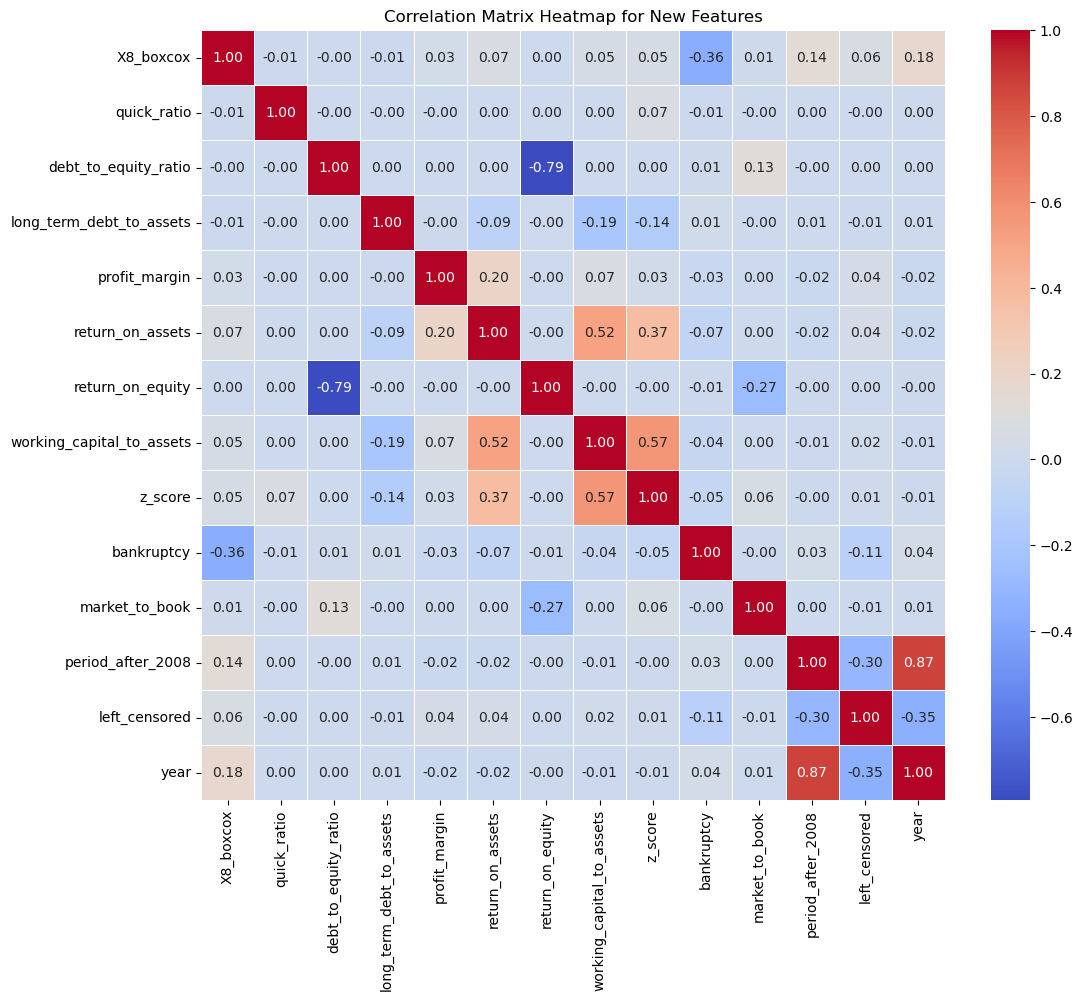

In [51]:
import seaborn as sns

# Convert the specified columns to numeric
for column in selected_features:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Calculate the correlation matrix for the newly created variables
corr_matrix_new_vars = df[selected_features].corr().round(3)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_new_vars, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap for New Features')
plt.show()

In [220]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame to calculate VIF
X = df[selected_features]  # Replace 'new_features' with the list of your features
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Replace inf values with a descriptive label and round VIF values
vif_data["VIF"] = vif_data["VIF"].replace(np.inf, np.nan)  # Replace inf with NaN for clarity
vif_data["VIF"] = vif_data["VIF"].round(3)  # Round to 3 decimal places

# Sort by VIF values for better readability
vif_data = vif_data.sort_values(by="VIF", ascending=False)

# Print the cleaned VIF values
print(vif_data)


                     Variable    VIF
12                       year  4.146
10          period_after_2008  4.039
6   working_capital_to_assets  1.790
7                     z_score  1.526
5            return_on_assets  1.442
0                   X8_boxcox  1.205
8                  bankruptcy  1.164
4               profit_margin  1.048
11              left_censored  1.046
3    long_term_debt_to_assets  1.040
9              market_to_book  1.022
2        debt_to_equity_ratio  1.017
1                 quick_ratio  1.008


Correlation Matrix on Transformed Features

Features to choose from: 
'X8_boxcox', 'quick_ratio_reciprocal', 'debt_to_equity_ratio_log', 
    'long_term_debt_to_assets_reciprocal', 'return_on_equity_log', 
    'working_capital_to_assets_sqrt', 'z_score_log', 
    'bankruptcy', 'market_to_book_log', 'period_after_2008', 
    'left_censored', 'year' 

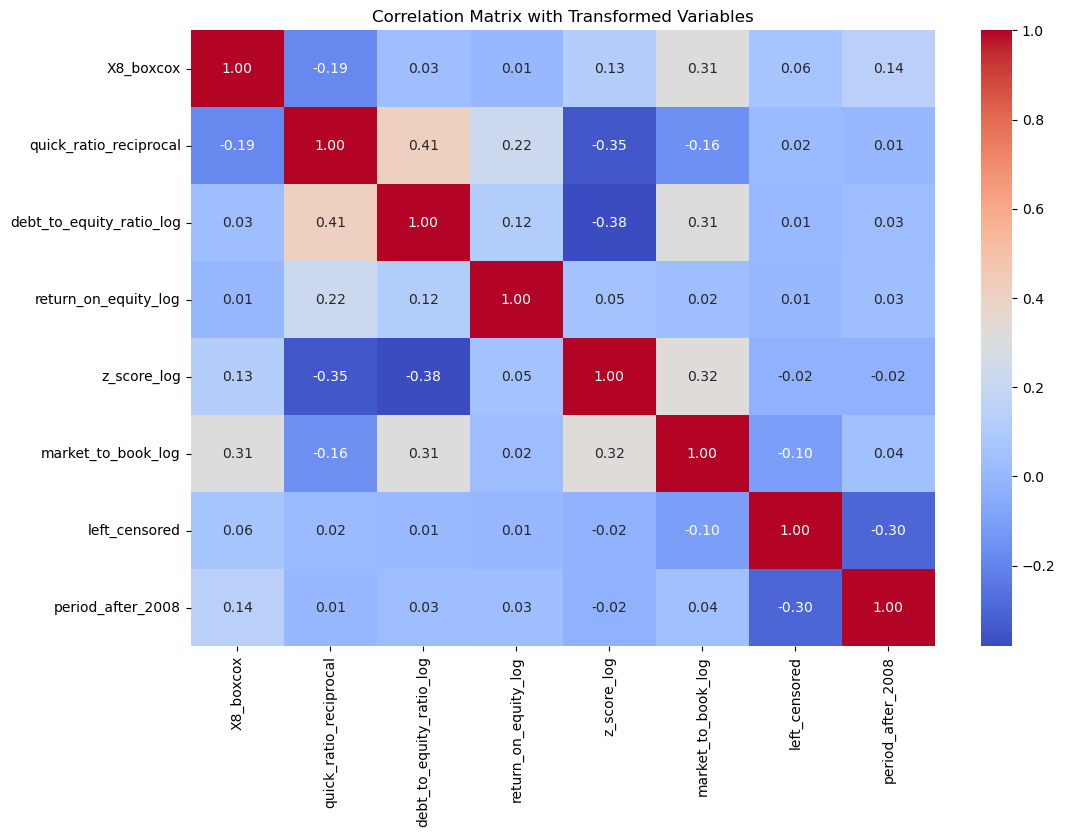

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Update the selected features with transformed variables
selected_features_transformed = [
    'X8_boxcox', 'quick_ratio_reciprocal', 'debt_to_equity_ratio_log', 
    'return_on_equity_log', 'z_score_log', 'market_to_book_log', 'left_censored', 
    'period_after_2008' 
]

# Create the correlation matrix
correlation_matrix = df[selected_features_transformed].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix with Transformed Variables")
plt.show()

In [68]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame to calculate VIF
X = df[selected_features_transformed]  # Transformed features added
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Replace inf values with a descriptive label and round VIF values
vif_data["VIF"] = vif_data["VIF"].replace(np.inf, np.nan)  # Replace inf with NaN for clarity
vif_data["VIF"] = vif_data["VIF"].round(3)  # Round to 3 decimal places

# Sort by VIF values for better readability
vif_data = vif_data.sort_values(by="VIF", ascending=False)

# Print the cleaned VIF values
print(vif_data)


                   Variable    VIF
0                 X8_boxcox  6.229
5        market_to_book_log  5.419
1    quick_ratio_reciprocal  5.187
4               z_score_log  4.982
2  debt_to_equity_ratio_log  4.652
6             left_censored  3.355
7         period_after_2008  1.898
3      return_on_equity_log  1.041


In [56]:
# Check for missing values
print("Missing values per column:")
print(X.isna().sum())

# Check for infinite values
print("\nInfinite values per column:")
print(np.isinf(X).sum())

Missing values per column:
X8_boxcox                                  0
quick_ratio_reciprocal                     0
debt_to_equity_ratio_log                7792
long_term_debt_to_assets_reciprocal        0
return_on_equity_log                    6267
working_capital_to_assets_sqrt         15241
z_score_log                            12140
bankruptcy                                 0
market_to_book_log                      5172
period_after_2008                          0
left_censored                              0
year                                       0
dtype: int64

Infinite values per column:
X8_boxcox                              0
quick_ratio_reciprocal                 0
debt_to_equity_ratio_log               0
long_term_debt_to_assets_reciprocal    0
return_on_equity_log                   0
working_capital_to_assets_sqrt         0
z_score_log                            0
bankruptcy                             0
market_to_book_log                     0
period_after_2008     

In [ ]:
# Reduced Features to select from:
'X8_boxcox', 'quick_ratio_reciprocal', 'debt_to_equity_ratio_log', 
    'return_on_equity_log', 'z_score_log', 'market_to_book_log', 'left_censored', 
    'period_after_2008'

In [69]:
# Select features for inclusion in the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define the selected features and target variable
selected_features_transformed_reduced = [
    'X8_boxcox', 'quick_ratio_reciprocal', 'debt_to_equity_ratio_log', 
    'return_on_equity_log', 'z_score_log', 'market_to_book_log', 'left_censored', 
    'period_after_2008'
]
X = df[selected_features_transformed_reduced]
y = df['target_last']  # the binary target variable

# Check for missing values in the selected features and target
print("Missing values in features:\n", X.isna().sum())
print("Missing values in target:", y.isna().sum())


Missing values in features:
 X8_boxcox                   0
quick_ratio_reciprocal      0
debt_to_equity_ratio_log    0
return_on_equity_log        0
z_score_log                 0
market_to_book_log          0
left_censored               0
period_after_2008           0
dtype: int64
Missing values in target: 0


LOGISTIC REGRESSION WITH TRANSFORMED FEATURES

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define the features (X) and target (y)
X = df[selected_features_transformed_reduced]  # Example features
y = df['target_last']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     15608
           1       0.00      0.00      0.00       129

    accuracy                           0.99     15737
   macro avg       0.50      0.50      0.50     15737
weighted avg       0.98      0.99      0.99     15737

Accuracy: 0.9918027578318612


c:\Users\deanh\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\deanh\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\deanh\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [71]:
# Check feature coefficients
coefficients = pd.DataFrame({'Feature': selected_features_transformed_reduced, 'Coefficient': log_reg.coef_[0]})
print("\nFeature Coefficients:")
print(coefficients)


Feature Coefficients:
                    Feature  Coefficient
0                 X8_boxcox    -0.167753
1    quick_ratio_reciprocal     1.774224
2  debt_to_equity_ratio_log     0.677682
3      return_on_equity_log     0.186868
4               z_score_log    -0.328284
5        market_to_book_log    -0.597811
6             left_censored    -0.121206
7         period_after_2008     0.250126


In [72]:
import statsmodels.api as sm

# Add a constant to the features for the intercept
X_with_const = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X_with_const)
result = logit_model.fit()

# Print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.039563
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:            target_last   No. Observations:                78682
Model:                          Logit   Df Residuals:                    78673
Method:                           MLE   Df Model:                            8
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                  0.1273
Time:                        14:51:58   Log-Likelihood:                -3112.9
converged:                       True   LL-Null:                       -3567.2
Covariance Type:            nonrobust   LLR p-value:                8.044e-191
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.7494      0.203    -23.352      0.000      -5.14

 COX PH WITH TRANSFORMED FEATURES

In [73]:
# Use target_last as the event column
df['event'] = df['target_last']

# Create the 'duration' column (time from the first year to the last year for each company)
df['duration'] = df.groupby('company_name')['year'].transform(lambda x: x.max() - x.min() + 1)


In [74]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
features_to_standardize = [
    'X8_boxcox', 'quick_ratio_reciprocal', 'debt_to_equity_ratio_log', 
    'return_on_equity_log', 'z_score_log', 'market_to_book_log', 'left_censored', 
    'period_after_2008'
]
scaler = StandardScaler()
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])

In [76]:
from lifelines import CoxPHFitter

# Define the dataset for the Cox PH model
cox_data = df[['X8_boxcox', 
               'quick_ratio_reciprocal', 
               'debt_to_equity_ratio_log', 
               'return_on_equity_log', 
               'z_score_log', 
               'market_to_book_log', 
               'left_censored', 
               'period_after_2008',
               'duration',  # Include the duration column
               'event']]    # Include the event column

# Initialize and fit the Cox PH model
cox_model = CoxPHFitter()
cox_model.fit(cox_data, duration_col='duration', event_col='event')

# Extract the summary as a DataFrame and round to 3 decimal places
summary_df = cox_model.summary.round(3)

# Display the summary DataFrame
print(summary_df)


                           coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                              
X8_boxcox                -0.472      0.624     0.046          -0.563   
quick_ratio_reciprocal    0.384      1.468     0.044           0.298   
debt_to_equity_ratio_log  0.406      1.500     0.029           0.348   
return_on_equity_log      0.152      1.164     0.032           0.090   
z_score_log              -0.293      0.746     0.037          -0.365   
market_to_book_log       -0.449      0.638     0.033          -0.514   
left_censored            -0.331      0.718     0.042          -0.413   
period_after_2008         0.011      1.011     0.042          -0.071   

                          coef upper 95%  exp(coef) lower 95%  \
covariate                                                       
X8_boxcox                         -0.382                0.570   
quick_ratio_reciprocal             0.471                1.347   
debt_to_equity_rati

In [ ]:
# Extract the summary from the Cox model
summary_df = cox_model.summary

# Select and rename key columns for clarity
clean_summary = summary_df[['coef', 'exp(coef)', 'p', 'coef lower 95%', 'coef upper 95%']].copy()
clean_summary.columns = ['Coefficient', 'Hazard Ratio', 'P-Value', 'Lower 95% CI', 'Upper 95% CI']

# Round the values for better readability
clean_summary = clean_summary.round(3)

# Display the cleaned summary
print(clean_summary)

                          Coefficient  Hazard Ratio  P-Value  Lower 95% CI  \
covariate                                                                    
X8_boxcox                      -0.472         0.624    0.000        -0.563   
quick_ratio_reciprocal          0.384         1.468    0.000         0.298   
debt_to_equity_ratio_log        0.406         1.500    0.000         0.348   
return_on_equity_log            0.152         1.164    0.000         0.090   
z_score_log                    -0.293         0.746    0.000        -0.365   
market_to_book_log             -0.449         0.638    0.000        -0.514   
left_censored                  -0.331         0.718    0.000        -0.413   
period_after_2008               0.011         1.011    0.787        -0.071   

                          Upper 95% CI  
covariate                               
X8_boxcox                       -0.382  
quick_ratio_reciprocal           0.471  
debt_to_equity_ratio_log         0.463  
return_on_equi

Most of the results are significant (except for the indicator variable for whether the period was after the financial crisis of 2008). Some of these results are counterintuitive. We would expect a higher quick ratio and return on equity to lower the hazard rate for bankruptcy rather than increase the hazard rate, as is the case here. 

Some other results are more in line with expectations: a higher debt to equity ratio increases the hazard rate. A higher Z-score lowers the hazard rate, keeping in mind that a lower Z-score is indicative of poor financial health. Also as expected, a higher market to book ratio (MB), also lowers the hazard rate. The MB measures market expectations about the prospects of the company, so the higher the market value relative to the book value of the company means the market believes the company is in good shape. The size of the company also significantly lowers the hazard of bankruptcy, which accounts for the fact that smaller firms are often at greater financial risk. Also, left_censored companies are also at significantly lower hazard of bankruptcy. This can be thought of as an age effect - in the absence of age data. So companies that are in the first year of dataset, compared to those that entered later, are at lower risk.

Interpreting the effects: 
Hazard Ratios (HR):
- Derived from the exponentiation of the coefficients (exp(coef)).

- Indicate the multiplicative effect of a one-unit increase in the predictor on the hazard.

HR > 1: Increases the hazard (higher risk).
HR < 1: Decreases the hazard (lower risk).
HR = 1: No effect on the hazard.

- then check p-value for significance

A lot to fix here but just a quick shot.

Some ideas for further research: 
Some possible interactions: 
1. Size × Leverage
Interaction between company size (e.g., total assets) and leverage ratios (e.g., debt-to-equity ratio) could reveal how the impact of leverage on bankruptcy risk varies with company size. For instance, smaller firms might be more vulnerable to high leverage compared to larger firms.

2. Profitability × Liquidity
The relationship between profitability (e.g., net income) and liquidity (e.g., current ratio) might interact to influence bankruptcy risk. A profitable company with poor liquidity could still face short-term financial distress.

3. Growth × Leverage
Interaction between growth metrics (e.g., revenue growth) and leverage could highlight how rapidly growing companies manage debt differently and how this affects bankruptcy risk.

It would also be useful to explore other non-linear effects, as well as lagged effects.

In [ ]:
# Create a copy of the entire DataFrame
df_copy = df.copy()

# Verify the copy
print(df_copy.head())  # Display the first few rows of the copied DataFrame

In [79]:
# Save the copied DataFrame to a new CSV file
df_copy.to_csv(r'C:\Users\deanh\OneDrive\DSI\modules\Company-Bankruptcy-Prediction\american_bankruptcy_copy.csv', index=False)